In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Define Activate Function

### Sigmoid

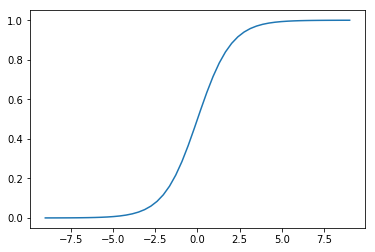

In [2]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

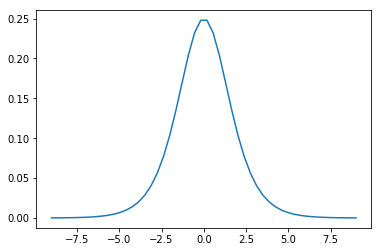

In [7]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### ReLU

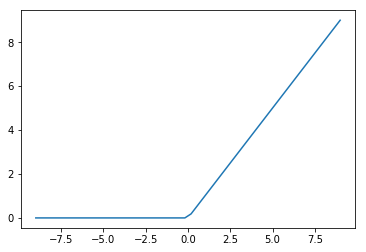

In [8]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

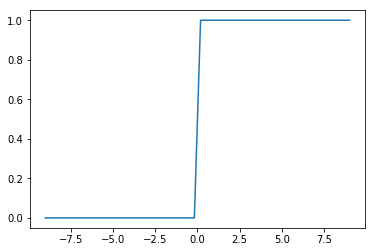

In [10]:
def relu_derivation(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivation(xx)

plt.plot(xx, yy)

### Benchmark

In [11]:
%time tmp = [sigmoid(i) for i in range(1000000)]
%time tmp = [relu(i) for i in range(1000000)]

CPU times: user 1.89 s, sys: 24.9 ms, total: 1.91 s
Wall time: 1.92 s
CPU times: user 166 ms, sys: 14.3 ms, total: 180 ms
Wall time: 180 ms


In [12]:
%time tmp = [sigmoid_derivative(i) for i in range(1000000)]
%time tmp = [relu_derivation(i) for i in range(1000000)]

CPU times: user 3.83 s, sys: 19.2 ms, total: 3.85 s
Wall time: 3.85 s
CPU times: user 167 ms, sys: 7.05 ms, total: 174 ms
Wall time: 174 ms


### MNIST Dataset

In [13]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

Using TensorFlow backend.


label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


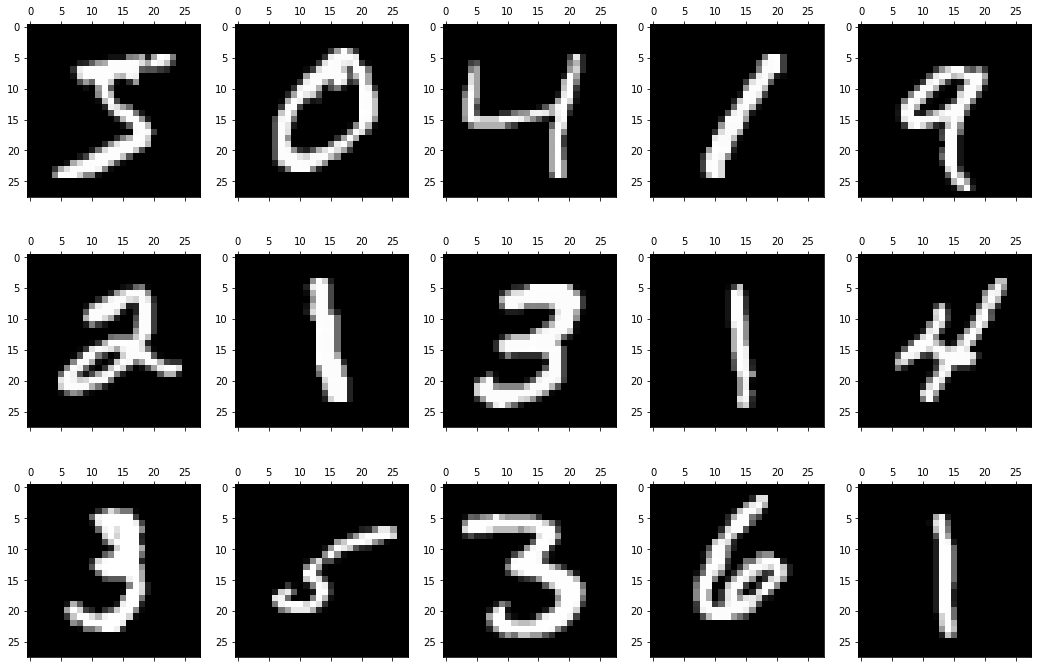

In [14]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()

print("label = {0}".format(y_train[0:15]))

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])
axes[2][0].matshow(X_train[10])
axes[2][1].matshow(X_train[11])
axes[2][2].matshow(X_train[12])
axes[2][3].matshow(X_train[13])
axes[2][4].matshow(X_train[14])

### Preprocessing

In [15]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [18]:
from keras.utils import to_categorical

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


## Train

### Sigmoid

In [48]:
from time import time

start = time()

num_epoch = 10
learning_rate = 0.000001

w1 = np.random.uniform(low=-np.sqrt(6 / (784 + 100)), high=np.sqrt(6 / (784 + 100)), size=(784, 100))
w2 = np.random.uniform(low=-np.sqrt(6 / (784 + 100)), high=np.sqrt(6 / (784 + 100)), size=(100, 100))
w3 = np.random.uniform(low=-np.sqrt(6 / (784 + 100)), high=np.sqrt(6 / (784 + 100)), size=(100, 10))

sigmoid_epoch_list = []

for epoch in range(num_epoch):
    z1 = X_train.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    z3 = a2.dot(w3)
    a3 = sigmoid(z3)
    
    y_predict = np.argmax(a3, axis=1)
    error = (y_train != y_predict).mean()
    
#     if epoch % 10 == 0:
    print("{0:2} error = {1:.5f}".format(epoch, error))
    
    end = time()
    sigmoid_epoch_list.append({
        'time': end - start,
        'error': error,
    })
    
    d3 = a3 - y_train_hot
    d2 = d3.dot(w3.T) * sigmoid_derivative(a2)
    d1 = d2.dot(w2.T) * sigmoid_derivative(a1)
    
    w3 = w3 - learning_rate * a2.T.dot(d3)
    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)

print("----" * 10)
print("{0:2} error = {1:.5f}".format(epoch,error))

 0 error = 0.87383


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 1 error = 0.89595
 2 error = 0.88615
 3 error = 0.87280
 4 error = 0.83297
 5 error = 0.82972
 6 error = 0.86312
 7 error = 0.88298
 8 error = 0.88617
 9 error = 0.88762
----------------------------------------
 9 error = 0.88762


In [44]:
sigmoid_epoch_list

[{'error': 0.90069999999999995, 'time': 0.6390759944915771},
 {'error': 0.90069999999999995, 'time': 2.10335111618042},
 {'error': 0.89783333333333337, 'time': 3.460814952850342},
 {'error': 0.88160000000000005, 'time': 4.807070970535278},
 {'error': 0.84091666666666665, 'time': 6.154294967651367},
 {'error': 0.88348333333333329, 'time': 7.477100133895874},
 {'error': 0.88753333333333329, 'time': 8.842007160186768},
 {'error': 0.88763333333333339, 'time': 10.155969142913818},
 {'error': 0.88763333333333339, 'time': 11.521703004837036},
 {'error': 0.88763333333333339, 'time': 12.937646865844727}]

### ReLU

In [45]:
from time import time

start = time()

num_epoch = 10
learning_rate = 0.00000001

w1 = np.random.randn(784, 100) * np.sqrt(2.0 / 784)
w2 = np.random.randn(100, 100) * np.sqrt(2.0 / 100)
w3 = np.random.randn(100, 10) * np.sqrt(2.0 / 100)

# w1 = np.random.uniform(low=-np.sqrt(6 / (784 + 100)), high=np.sqrt(6 / (784 + 100)), size=(784, 100))
# w2 = np.random.uniform(low=-np.sqrt(6 / (784 + 100)), high=np.sqrt(6 / (784 + 100)), size=(100, 100))
# w3 = np.random.uniform(low=-np.sqrt(6 / (784 + 100)), high=np.sqrt(6 / (784 + 100)), size=(100, 10))

relu_epoch_list = []

for epoch in range(num_epoch):
    z1 = X_train.dot(w1)
    a1 = relu(z1)
    z2 = a1.dot(w2)
    a2 = relu(z2)
    z3 = a2.dot(w3)
    a3 = sigmoid(z3)
    
    y_predict = np.argmax(a3, axis=1)
    error = (y_train != y_predict).mean()
    
#     if epoch % 10 == 0:
    print("{0:2} error = {1:.5f}".format(epoch, error))
    
    end = time()
    relu_epoch_list.append({
        'time': end - start,
        'error': error,
    })
    
    d3 = a3 - y_train_hot
    d2 = d3.dot(w3.T) * relu_derivation(a2)
    d1 = d2.dot(w2.T) * relu_derivation(a1)
    
    w3 = w3 - learning_rate * a2.T.dot(d3)
    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)
    

print("----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.90175


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 1 error = 0.90367
 2 error = 0.87875
 3 error = 0.86445
 4 error = 0.84132
 5 error = 0.81488
 6 error = 0.87763
 7 error = 0.68610
 8 error = 0.63107
 9 error = 0.59578
----------------------------------------
 9 error = 0.59578


In [46]:
relu_epoch_list

[{'error': 0.90175000000000005, 'time': 0.585798978805542},
 {'error': 0.90366666666666662, 'time': 1.6706609725952148},
 {'error': 0.87875000000000003, 'time': 2.728019952774048},
 {'error': 0.86445000000000005, 'time': 3.7610108852386475},
 {'error': 0.84131666666666671, 'time': 4.937871932983398},
 {'error': 0.81488333333333329, 'time': 5.983630895614624},
 {'error': 0.87763333333333338, 'time': 7.048823118209839},
 {'error': 0.68610000000000004, 'time': 8.161607027053833},
 {'error': 0.63106666666666666, 'time': 9.19240403175354},
 {'error': 0.59578333333333333, 'time': 10.234477758407593}]

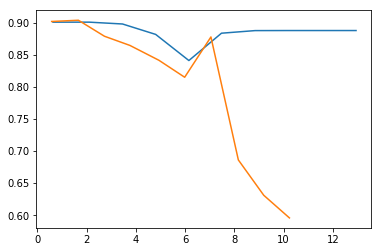

In [47]:
import pandas as pd

sigmoid_epoch_list = pd.DataFrame(sigmoid_epoch_list)
relu_epoch_list = pd.DataFrame(relu_epoch_list)

plt.plot(sigmoid_epoch_list["time"], sigmoid_epoch_list["error"])
plt.plot(relu_epoch_list["time"], relu_epoch_list["error"])

### CiFar 10 Kear Conv 3x3